**Student name:** Maksim Karnaukh

**Student ID:** 20201604

# Lab 1: Multi-Armed Bandits

### Instructions: **TODO** tags
In this lab session, we will be implementing the multi-armed bandit framework, along with several algorithms studied in the course. This lab aims to understand their differences in design and performance.

Please *read* and *run* the notebook chronologically, and fill in the **TODO**s as you encounter them.
* <span style="color:blue"> Blue **TODOs** </span> means you have to implement the TODOs in the code.
* <span style="color:red"> Red **TODOs** </span> means you have to submit an explanation (of graph/results).


At each section, <span style="color:green"> (xx points) </span> indicates the number of points of the entire section (labs are graded out of 10).
### Libraries
- We will be using [numpy](https://numpy.org/doc/stable/user/absolute_beginners.html), the main library for linear algebra in Python, for virtually all of our mathematical operations in all the labs. It enables efficient operations on arrays of scalars. If you are unfamiliar with numpy, please look into the documentation or tutorials (navigator searches work well!). In this lab, you will for example need to [initialize arrays](https://numpy.org/doc/stable/reference/generated/numpy.full.html) or [generate random numbers](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html) from miscellaneous distributions.

- We will be using [matplotlib](https://matplotlib.org/stable/index.html) for plotting. You normally won't need to look into it, but feel free to do so if you need to display fancier graphs.


## 1. <span style="color:green"> (3 points) </span> Multi-armed Bandit Setting
First we will implement the agent-bandit interactions. <br>
At each step, the *Agent* performs an *action* using its *policy*. This is formalized as the `act` method. <br>
Given said action, the *Bandit* (slot machine) provides a *reward* as feedback. This is formalized as the `pull` method. <br>
The agent *learns* from that feedback (adapts its policy). This is formalized as the `learn` method.

In [137]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### 1.1. Abstract Agent object
The Agent is `reset` at the start of a run. <br>
During a run, it can `act` to pull a lever, and `learn` from an `action`-`reward` pair.<br>
Please read the doc and function signatures; you don't have to write anything here.

In [138]:
class Bandit_Agent(object):
    """
    Abstract Agent to solve a Bandit problem.

    Contains the methods learn() and act() for the base life cycle of an agent.
    The reset() method reinitializes the agent.
    The minimum requirement to instantiate a child class of Bandit_Agent
    is that it implements the act() method.
    """
    def __init__(self, k:int, **kwargs):
        """
        Simply stores the number of arms of the Bandit problem.
        The __init__() method handles hyperparameters.
        Parameters
        ----------
        k: positive int
            Number of arms of the Bandit problem.
        kwargs: dictionary
            Additional parameters, ignored.
        """
        self.k = k

    def reset(self):
        """
        Reinitializes the agent to 0 knowledge, good as new.

        No inputs or outputs.
        The reset() method handles variables.
        """
        pass

    def learn(self, a:int, r:float):
        """
        Learning method. The agent learns that action a yielded reward r.
        Parameters
        ----------
        a: positive int < k
            Action that yielded the received reward r.
        r: float
            Reward for having performed action a.
        """
        pass

    def act(self) -> int:
        """
        Agent's method to select a lever (or Bandit) to pull.
        Returns
        -------
        a : positive int < k
            The action the agent chose to perform.
        """
        raise NotImplementedError("Calling method act() in Abstract class Bandit_Agent")


### 1.2. <span style="color:blue"> **TODO** </span>: Random Agent
Now we implement the *Random* Agent as a baseline. <br> 
The Random agent does not learn, it picks a random action at all steps. <br>
<span style="color:blue"> **TODO** </span> Implement the  act method of the Random Agent.

In [139]:
class Random_Agent(Bandit_Agent):
    """
    This agent doesn't learn, just acts purely randomly.
    """
    def act(self):
        """
        Random action selection.
        Returns
        -------
        a : positive int < k
            A randomly selected action.
        """
        # DONE, using the numpy random function
        return np.random.randint(self.k)

### 1.3. <span style="color:blue"> **TODO** </span> KBandit object
In this lab our k-armed Bandit is going to be a set of k Gaussian distributions. We **also** select the **means** from a **standard normalized Gaussian N(0,1)**. Note that in the general case, the distributions of each rewards can be anything and don't have to be within the same distribution family. 

The KBandit (k-armed Bandit) is `reset` at the start of a run. <br>
During a run, the agent chooses a lever, which the bandit `pull`s to output a reward.<br>
Please read the doc and function signatures; you don't have to write anything here.

<span style="color:blue"> **TODO** </span>: fill in the TODOs in the code (1 in `reset` method; 1 in `pull` method).

In [140]:
class KBandit(object):
    """ Set of k Gaussian distributions as reward functions. """
    def __init__(self, k, **kwargs):
        """
        Instantiates the k-armed bandit, with a number of arms, and initializes
        the set of distributions to new standardized Gaussians in a list.
        The reset() method is supposedly called from outside.
        The means are chosen randomly in a standard normalized Gaussian N(0,1).
        Parameters
        ----------
        k: positive int
            Number of arms of the problem.
        """
        self.k = k
        self.distributions = None

    def reset(self):
        """ Resets each of the k bandits. """
        # DONE: list of k Gaussians, i.e. (mu,std=1) pairs, with mu sampled from N(0,1)
        self.distributions = [(np.random.normal(), 1) for _ in range(self.k)]
        
    def best_action(self):
        """ A function only for our analysis; the agents do not know this. """
        return np.argmax([distrib[0] for distrib in self.distributions]) # for plotting purposes
        
    def pull(self, action:int) -> float:
        """
        Pulls the lever corresponding to the action. 
        In other words, samples a reward from the corresponding distribution.
        Returns the reward.
        Parameters
        ----------
        action: positive int < k
            Lever to pull.
        Returns
        -------
        reward : float
            Reward for pulling this lever.
        """
        # DONE: pull a lever to sample a reward given an action, return the reward.
        mean, std = self.distributions[action]
        return np.random.normal(mean, std)

### 1.4. <span style="color:blue"> **TODO** </span> Running the Agent-Bandit interactions
Now we can implement the loop of interactions of the Agent with the Bandit.
To visualize our results, we want to store the reward obtained, as well as whether the action performed was optimal.

<span style="color:blue"> **TODO** </span>: fill in the TODOs in the code.

In [141]:
def run_bandit(agent, kbandit, max_steps) -> (np.array, np.array):
    """
    Runs a Bandit problem once. The kbandit and agent are reinitializated,
    then for max_steps, we run the bandit-agent interactions with learning.
    We return the performance of the agent, i.e. the rewards along the way,
    as well as a boolean array of the best action being performed.
    Parameters
    ----------
    agent: Bandit_Agent
        An instance of a Bandit_Agent to solve the problem.
    kbandit: KBandit
        k-armed bandit problem, i.e. k slot machines with a reward distribution.
    max_steps: positive int
        Number of steps to run the problem.
    Returns
    -------
    perf, best_action : np.array, np.array
        Arrays of size max_steps containing all
            - perf: rewards obtained by the agent during the run.
            - best_action: boolean array, whether the agent did the best action.
    """
    # DONE: prepare the agent and bandit for the run.
    agent.reset()
    kbandit.reset()
    
    perf = np.empty(max_steps)
    best_action = np.empty(max_steps)
    for step in range(max_steps):
        # DONE: agent acts
        action = agent.act()
        # DONE: pull an arm of the bandit
        reward = kbandit.pull(action)
        # DONE: learn that this action gave this reward
        agent.learn(action, reward)

        # Plotting. Nothing to do here.
        perf[step] = reward
        best_action[step] = int(action == kbandit.best_action())

    return perf, best_action

### 1.5. Plotting the results: Random Agent performance
Since these experiments involve a lot of stochasticity, we do multiple runs in order to extract average behavior.<br>
**Run** the following cells to visualize the Random agent performance. <br>
You don't have anything to write in the next code cells. Please do read through them to understand what we're doing.<br>

In [142]:
def run_multiple_bandits(n_runs, **kwargs) -> (np.array, np.array):
    """
    Runs multiple independent bandit problems; outputs the mean of the results.
    Parameters
    ----------
    agent, kbandit, n_runs: see run_bandit
        See function run_bandit
    Returns
    -------
    ret : expected_type
        description
    """
    perfs = []
    best_actions = []
    for run in range(n_runs):
        perf, best_action = run_bandit(**kwargs)
        perfs.append(perf)
        best_actions.append(best_action)

    return np.mean(perfs,axis=0), np.mean(best_actions,axis=0)

In [143]:
def make_plot(l, suptitle, title, xlabel, ylabel,
              labels=None, interval_yaxis=None):
    """ Simply saves a plot with multiple usual arguments."""
    if labels is None:
        plt.plot(l)
    else:
        for perf, label in zip(l, labels):
            plt.plot(smooth_fast(perf), label=label)
        plt.legend()

    plt.suptitle(suptitle, fontsize=14, fontweight='bold')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if interval_yaxis is not None:
        new_y1, new_y2 = interval_yaxis
        x1,x2,y1,y2 = plt.axis()
        plt.axis((x1,x2,new_y1,new_y2))

    plt.plot()
    plt.show()
    
def smooth_fast(y, box_pts=5):
    n = len(y)
    ws = 2*box_pts +1
    y_smooth = []
    for i,yi in enumerate(y):
        if i < box_pts:
            y_smooth.append(None)
        elif i == box_pts:
            y_smooth.append(np.mean(y[i-box_pts:i+box_pts+1]))
        elif i < n - box_pts:
            y_smooth.append(y_smooth[i-1] + (y[i + box_pts] - y[i - box_pts - 1])/ws)
        elif i < n:
            y_smooth.append(None)

    return y_smooth

def action_plot(l, suptitle, title, labels=None):
    make_plot(l, suptitle, title, 'Steps', 'Best action proportion', labels, interval_yaxis=[0,1])

def perf_plot(l, suptitle, title, labels=None):
    make_plot(l, suptitle, title, 'Steps', 'Average Reward', labels, interval_yaxis=None)

def dict_string(d):
    """ Turns a dictionary to a single readable string """
    s = ""
    for key, value in d.items():
        s += "{}:{}, ".format(key, value)
    return s[:-2] # erase final comma and space

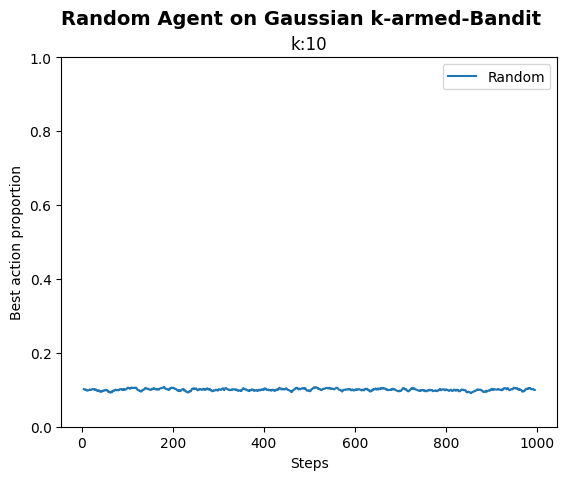

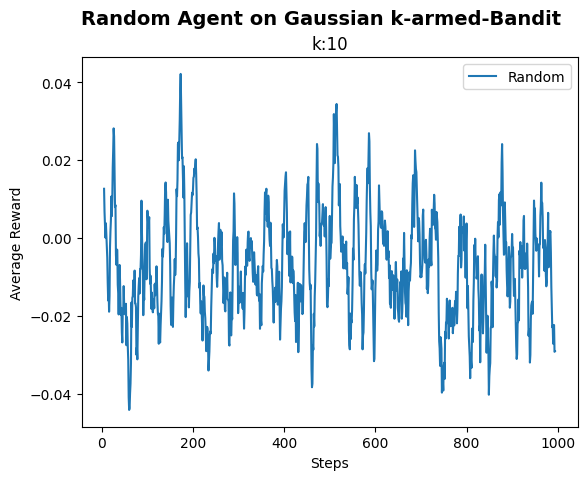

In [144]:
## HYPERPARAMETERS AND AGENTS ==================================================
config = {
    'k': 10
}

n_runs = 1000
max_steps = 1000 # time budget per run
agent = Random_Agent(**config)
kbandit = KBandit(**config)

perfs, best_actions = run_multiple_bandits(n_runs, agent=agent, kbandit=kbandit, max_steps=max_steps)
labels = ['Random']
suptitle = 'Random Agent on Gaussian k-armed-Bandit'
title = dict_string(config)

action_plot ([best_actions], suptitle, title, labels)
perf_plot   ([perfs],  suptitle, title, labels)

### 1.6. <span style="color:red"> **TODO** </span> Please explain your results in a paragraph in this cell.

#### Explanation
From the plots we can see that the Random Agent doesn't perform well on the k-armed bandit problem. The percentage of the best action being performed is roughly around 0.1 (10%), because the agent is not learning and is choosing pure randomly. The average reward is also very low, roughly fluctuating in the range [-0.4, 0.4], since the agent is not learning to select the best action. This can serve as a baseline for other methods (as plotted later).

## 2. <span style="color:green"> (7 points) </span> Bandit Algorithms
Now we are going to implement learning Agents in order to select the best action/lever/arm to pull to maximize the obtained reward.

**Note** that a lot of these agents will use an `argmax`, however numpy returns the *first* argmax, while we want to break ties randomly, since there is no reason to prefer an action than another, and this might harm exploration. Please use the following argmax function:

In [145]:
def my_argmax(x):
    return np.random.choice(np.where(x == x.max())[0])

### 2.1. <span style="color:blue"> **TODO** </span> Epsilon-Greedy, Sample Average

In [146]:
class EpsGreedy_SampleAverage(Bandit_Agent):
    # DONE: implement this class following the Agent formalism above.
    # This class uses Sample Averages to estimate q; others are non stationary.
    
    def __init__(self, eps, k, **kwargs):
        self.eps = eps
        self.k = k
        super().__init__(self.k, **kwargs)
        self.q = np.zeros(self.k, dtype=np.float64)
        self.n = np.zeros(self.k)
        
    def reset(self):
        self.q = np.zeros(self.k, dtype=np.float64)
        self.n = np.zeros(self.k)
        
    def learn(self, a:int, r:float):
        self.n[a] += 1
        self.q[a] += (r - self.q[a]) / self.n[a]
        
    def act(self) -> int:
        if np.random.rand() < self.eps:
            return np.random.randint(self.k)
        else:
            return my_argmax(self.q)


### 2.2. <span style="color:blue"> **TODO** </span> Epsilon-Greedy, Weighted Average
Please use `lr` for the learning rate; it is passed as input to the `__init__` method.

In [147]:
class EpsGreedy_WeightedAverage(EpsGreedy_SampleAverage):
    # DONE: implement this class following the formalism above.
    # Non stationary agent with q estimating and eps-greedy action selection.
    
    # PLEASE USE THE LR HYPERPARAMETER FOR THE LEARNING RATE
    
    def __init__(self, **kwargs):
        self.lr = kwargs['lr']
        super().__init__(**kwargs)
        
    def learn(self, a:int, r:float):
        self.n[a] += 1
        self.q[a] += self.lr * (r - self.q[a])

### 2.3. <span style="color:blue"> **TODO** </span> Optimistic Greedy

In [148]:
class OptimisticGreedy(EpsGreedy_WeightedAverage):
    # DONE: implement this class following the formalism above.
    # Same as above but with optimistic starting values.
    
    def __init__(self, q0, **kwargs):
        self.q0 = q0
        super().__init__(**kwargs)
        self.q = np.full(self.k, self.q0, dtype=np.float64)
        self.n = np.zeros(self.k)
        
    def reset(self):
        self.q = np.full(self.k, self.q0, dtype=np.float64)
        self.n = np.zeros(self.k)
        
    def act(self) -> int:
        # since the distributions don't change (stationary), we can just use the argmax; it will work best with eps=0.
        return my_argmax(self.q)

### 2.4. <span style="color:blue"> **TODO** </span> UCB
UCB works with either Sample or Weighted Averages. Please use Weighted Averages. Please use `lr` for the learning rate; it is passed as input to the `__init__` method.

In [149]:
class UCB(EpsGreedy_WeightedAverage):
    # DONE: implement this class following the formalism above.
    
    # PLEASE USE THE LR HYPERPARAMETER FOR THE LEARNING RATE
    
    def __init__(self, c, **kwargs):
        self.c = c
        super().__init__(**kwargs)
        self.t = 0
        
    def reset(self):
        super().reset()
        self.t = 0
        
    def act(self):
        self.t += 1
        indices_of_zero = np.where(self.n == 0)[0]
        if len(indices_of_zero) > 0: # if there are still unexplored actions (meaning n[a] == 0 for some a)
            return np.random.choice(indices_of_zero)
        else:
            return my_argmax(np.array([self.q[i] + self.c * np.sqrt(np.log(self.t) / self.n[i]) for i in range(self.k)]))

### 2.5. <span style="color:blue"> **TODO** </span> Gradient Bandit
Please use `alpha` for the learning rate; it is passed as input to the `__init__` method.

Below are some functions that you might find useful: the softmax function used to extract a policy from the preferences; and a surprisingly faster version of `np.random.choice`, which is trying to do too complicated things for our simple purposes.

In [150]:
# You don't have anything to do in this cell. These methods will be helpful for the Gradient Bandit Agent.
def softmax(x):
    """ Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def my_random_choice(v, p=None):
    """ Faster version of the np.random.choice function with probabilities """
    if p is None:
        return v[np.random.randint(len(v))]
    # else (general case)
    assert (abs(sum(p)-1.)<1e-6), "Invalid probability vector p, sum={}".format(sum(p))
    r = np.random.rand()
    i = 0
    s = p[i]
    while s < r:
        i += 1
        s += p[i]

    if type(v) is int:
        assert len(p) == v, "Int doesn't match proba length: {} != {}".format(v, len(p))
        return i
    else:
        assert len(v) == len(p), "Incorrect entry lengths v,p: {} != {}".format(len(v), len(p))
        return v[i]

In [151]:
class Gradient_Bandit(Bandit_Agent):
    # DONE: implement this class following the formalism above.
    # If you want this to run fast, use the my_random_choice function defined above,
    # instead of np.random.choice to sample from the softmax.
    # You can also find the softmax function above.
    
    # PLEASE USE THE ALPHA HYPERPARAMETER FOR THE LEARNING RATE
    
    def __init__(self, alpha, c, k, **kwargs):
        self.k = k
        self.alpha = alpha
        self.c = c
        super().__init__(self.k, **kwargs)
        
        self.H = np.zeros(self.k, dtype=np.float64)
        self.avg_reward = 0.0
        self.t = 0
        
    def reset(self):
        self.H = np.zeros(self.k, dtype=np.float64)
        self.avg_reward = 0.0
        self.t = 0
        
    def learn(self, a:int, r:float):
        """
        Mostly based on the book. 
        """
        self.t += 1
        self.avg_reward += (r - self.avg_reward) / self.t
        
        e = r - self.avg_reward
        p = softmax(self.H)
        
        for action in range(self.k):
            a_pref = self.H[action]
            a_prob = p[action]
            if action == a:
                self.H[action] = a_pref + self.alpha * e * (1 - a_prob)
            else:
                self.H[action] = a_pref - self.alpha * e * a_prob
                        
    def act(self):
        p = softmax(self.H)
        return my_random_choice(self.k, p)


### 2.6. Plotting the results: All Agent performances.
We now compare all agents.
**Run** the following cells to visualize all the Agents' performances at once. <br>
You don't have anything to write in the next code cells. Please do read through them to understand what we're doing.<br>

*If don't want to test all agents at once during your implementation, comment out the rest from the list of `agents`.* <br> 
**You have to submit the combined plot with all the Agents; please don't make us run it.**

In [152]:
def run_multiple_agents(agents, **kwargs):
    """
    Launches run_multiple_bandits for a list of agents.
    Outputs a list of the returns.
    Parameters
    ----------
    agents : list of agents
        instantiated agents on which to perform the runs on.
    **kwargs: dictionary
        Inputs for the function run_multiple_bandits
    Returns
    -------
    ret : list
        list of the outputs from the run_multiple_bandits function for each
        agent from the agents list.
    """
    perfs = []
    best_actions = []
    for agent in agents:
        print(agent.__class__.__name__)
        kwargs['agent'] = agent
        perf, best_action = run_multiple_bandits(**kwargs)
        perfs.append(perf)
        best_actions.append(best_action)

    return perfs, best_actions

Random_Agent
EpsGreedy_WeightedAverage
EpsGreedy_SampleAverage
OptimisticGreedy
UCB
Gradient_Bandit


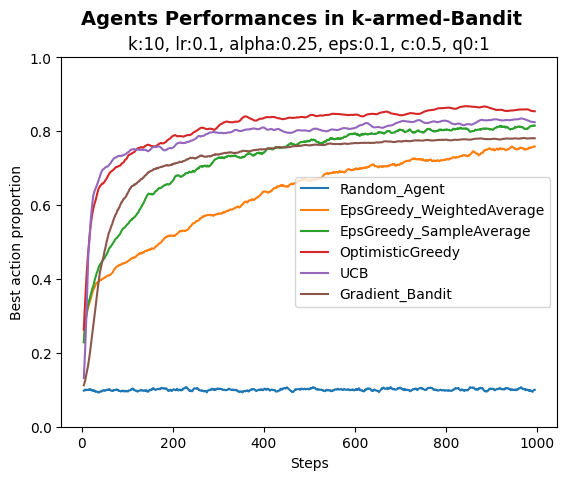

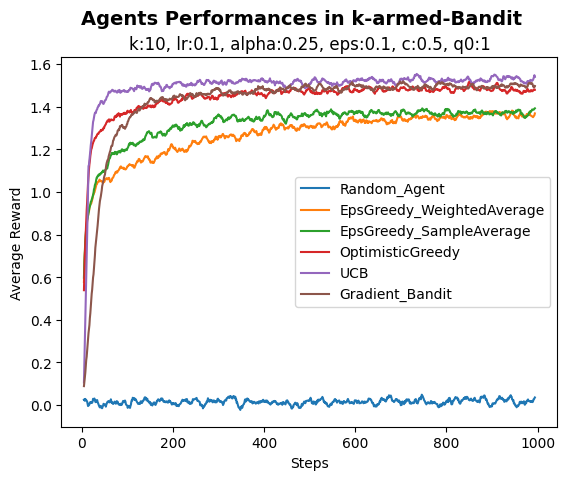

In [153]:
## HYPERPARAMETERS AND AGENTS ==================================================
config = {
    'k': 10,
    'lr': 0.1,
    'alpha': 0.25,
    'eps': 0.1,
    'c': 0.5,
    'q0': 1
}

n_runs = 1000
max_steps = 1000 # time budget per run
agents = [
    Random_Agent(**config),
    EpsGreedy_WeightedAverage(**config),
    EpsGreedy_SampleAverage(**config),
    OptimisticGreedy(**config),
    UCB(**config),
    Gradient_Bandit(**config)
]

kbandit = KBandit(**config)

perfs, best_actions = run_multiple_agents(agents=agents, n_runs=n_runs, kbandit=kbandit, max_steps=max_steps)
labels = [agent.__class__.__name__ for agent in agents]
suptitle = 'Agents Performances in k-armed-Bandit'
title = dict_string(config)

action_plot(best_actions, suptitle, title, labels)
perf_plot(perfs,  suptitle, title, labels)

### <span style="color:red"> **TODO** </span> Please explain your results in a paragraph in this cell.

#### Explanation

The Random Agent has already been discussed. Everything here performs significantly better than the Random Agent (the reason they are better than the Random Agent is because they are learning and are not choosing actions purely randomly), with the **Epsilon-Greedy with Sample Average** performing better than the **Epsilon-Greedy with Weighted Average** (the best action proportion is higher and converges more quickly to its maximum value, and the average reward is slightly higher (at the last timesteps)). One might find this odd. The reason for this, if I am correct, is because we are dealing with a stationary problem here, since our distributions don't change during a run of 1000 steps. Giving more weight to recent rewards, as this is the thought behind the Weighted Average, is not beneficial in this case as opposed to using an averaging method. Both reach an average reward around 1.3 (Weighted Average is slightly lower).

Among the Greedy Agents, the Epsilon-Greedy with Weighted Average is the worst, followed by Epsilon-Greedy with Sample Average. Next, Optimistic Greedy (with eps=0) performs similarly to UCB and Gradient Bandit (in terms of average reward). The **Gradient Bandit** (where we consider learning a numerical preference for each action, using also the softmax function), maybe contrary to intuition, performs evenly or slightly worse than UCB and Optimistic Greedy. It learns quicker than the two EpsGreedy agents, making its average reward higher (while its best action proportion limit lies a bit lower). But its best action proportion overall is still lower than UCB and Optimistic Greedy. 

The **UCB** agent performs well, as it uses Upper Confidence Bound action selection (selection based on higher optimality potential among the non-greedy actions). It quickly learns to select the best actions and reaches an 80% best action proportion (the rest (excluding Optimistic Greedy) is around 75% with the exception of the Epsilon-Greedy with Weighted Average being considerably lower) pretty fast, resulting in a higher average reward (from early on). This is expectable, since it tries not to just explore too, but do it in kind of a smart way.

The **Optimistic Greedy** agent is very close to UCB (its best action proportion lies higher even sometimes). The initial estimates there were set to 1, and considering the use of the normal distribution (so not all too optimistic but an alright amount), this encourages enough exploration for it to give this decent results. 
